Q : defaultdict跟dict差在哪裡啊？

In [29]:
dict = {"a":"apple" , "b":"banana"}  #創建一個dict
print(dict)
print(type(dict))  #檢查是否為dict型式

{'a': 'apple', 'b': 'banana'}
<class 'dict'>


In [25]:
dict["c"] 

KeyError: 'c'

對於dict，如果呼叫沒被定義過的key，會產生"keyerror"
所以用"defaultdict"，避免沒出現過的key產生error

In [20]:
dict = defaultdict(list)
print(type(dict))  #確定dict的形式

dict[1] = True
dict[2] = False
dict[3] = 1
print(dict)
# " defaultdict "可以將沒被定義過的key，放入dict

<class 'collections.defaultdict'>
defaultdict(<class 'list'>, {1: True, 2: False, 3: 1})


這可以當作每次在找鄰邊值時，記錄哪些點已經出現在queue，才不會被重新加入queue

Q : 測試怎麼從queue取出第一個數，然後append到answer

A : 我一開始是想到是直接queue.pop(0)，但這樣answer.append時，怎麼知道是append哪個值呢
     所以要把取出的值賦予一個名稱，這樣才方便append時，呼叫值進去

In [30]:
queue = [2]
answer =[]
vertex = queue.pop()
answer.append(vertex)

In [31]:
print(queue)
print(answer)

[]
[2]


這是我在紙上寫的構想

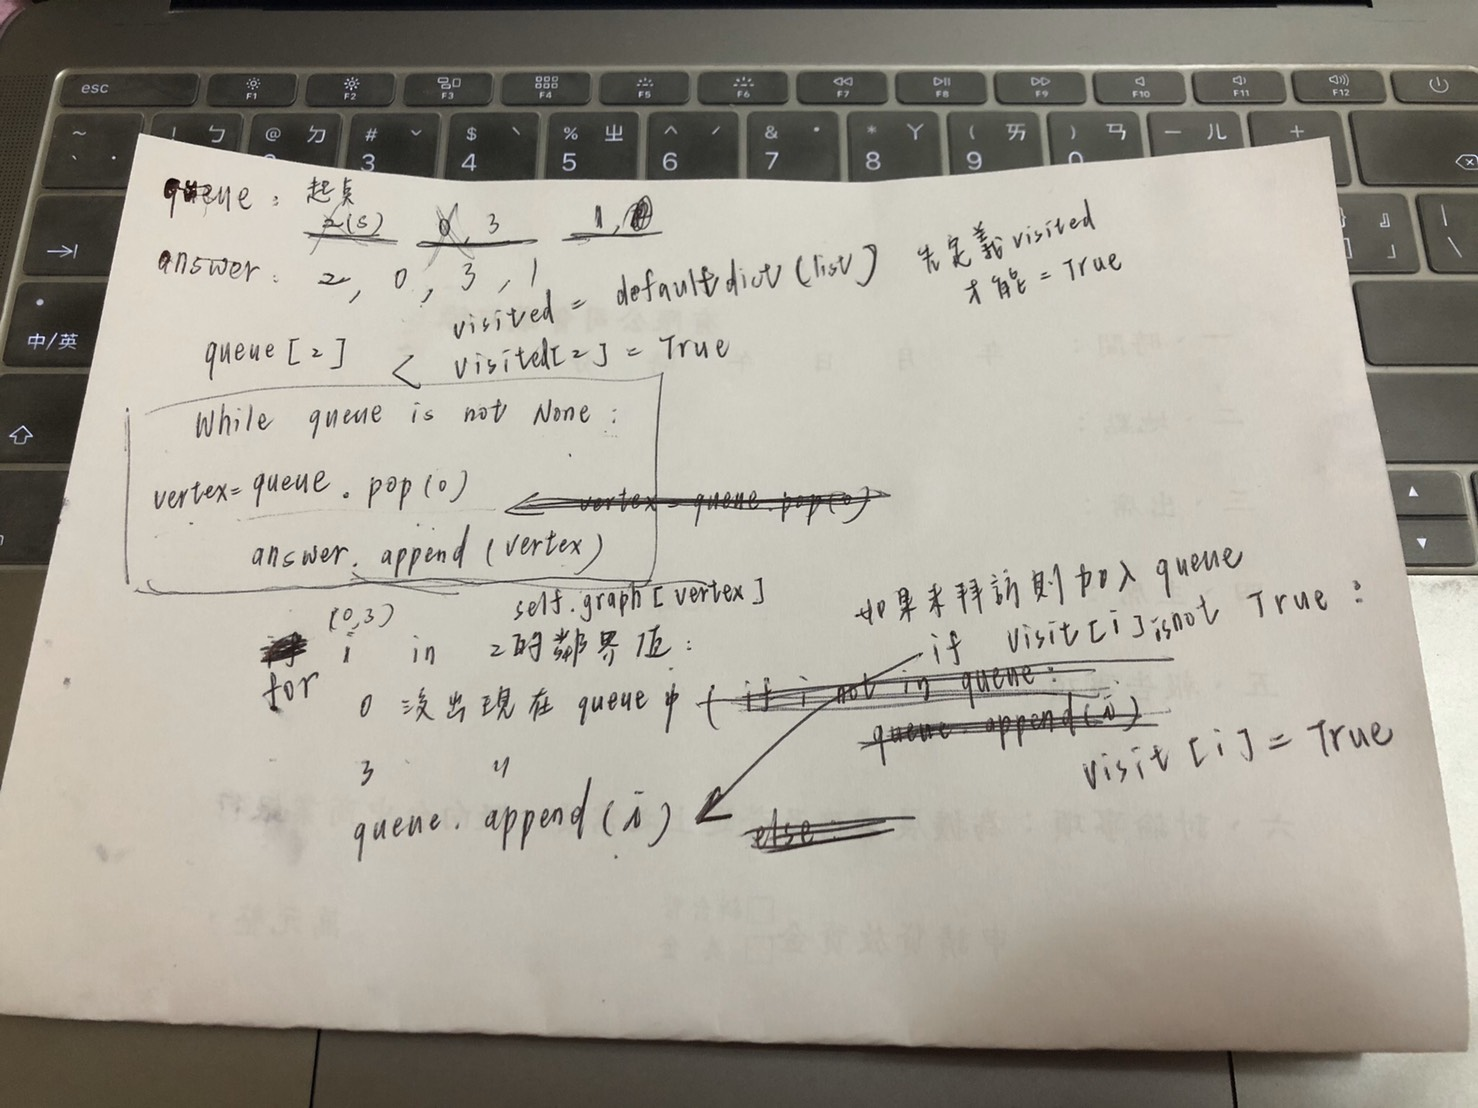

In [2]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/12:20H.W/紙上操作.jpg")

In [12]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        answer = []
        queue = [s]
        visited = defaultdict(list)  #defaultdict是加強版的dict，原本dict對於沒有定義的key，會報錯，但defaultdict能賦予新的key value
        visited[s] = True             #visited必須先被定義，才能給值
        while queue is not None:
            vertex = queue.pop(0)
            answer.append(vertex)
            for i in self.graph[vertex]:
                if visited[i] is not True:
                    visited[i] = True
                    queue.append(i)
        

    def DFS(self, s):
        pass
        
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)
print(g.BFS(2))
print(g.DFS(2))

IndexError: pop from empty list

26行錯，代表我的while迴圈寫錯了，所以當queue = [] 時，還繼續執行
我就自己試了一下" is " & " == "，有什麼差別

In [1]:
a = [1,2,3]
b = [1,2,3]
print(a is b)    # " is " 是判斷2個object是否為同一個，除了“值”也判斷“記憶體位置”

False


In [2]:
a = [1,2,3]
b = [1,2,3]
print(a == b)     # "==" 是看值有沒有相等

True


In [5]:
queue = [2,0,3,1]
print("id:", id(queue))
queue.pop(0)
print(queue)
print("id:", id(queue)) #即使新增、減少queue的內容，queue的id仍然不變
queue.pop(0)
print(queue)
print("id:", id(queue)) #即使新增、減少queue的內容，queue的id仍然不變

id: 4352344520
[0, 3, 1]
id: 4352344520
[3, 1]
id: 4352344520


結論：不能用“is”判斷list是否變成 [ ] 
         所以如果queue = []，not queue就是True
         ➡️改成while queue:

In [8]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        answer = []
        queue = [s]
        visited = defaultdict(list)    #visited必須先被定義，才能給值
        visited[s] = True
        while queue:
            vertex = queue.pop(0)
            answer.append(vertex)
            for i in self.graph[vertex]:
                if visited[i] is not True:
                    visited[i] = True
                    queue.append(i)
        return answer
        

    def DFS(self, s):
        pass
        
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)
print(g.BFS(2))
#print(g.DFS(2))

[2, 0, 3, 1]


至於DFS跟BFS差別只在於：

DFS : 從stack中取出最後一個數，再append到answer中
BFS : 從queue中取出第一個數，再append到answer中
所以我只改了vertex那一行

In [1]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        answer = []
        queue = [s]
        visited = defaultdict(list)    #visited必須先被定義，才能給值
        visited[s] = True
        #while queue is not None:
        #while queue != None:
        while queue:                #如果queue內有值
            vertex = queue.pop(0)
            answer.append(vertex)
            for i in self.graph[vertex]:
                if visited[i] is not True:   
                    visited[i] = True
                    queue.append(i)
            #print(answer)
            #print(queue)
            #print(id(queue))
        return answer
        

    def DFS(self, s):
        answer = []
        stack = [s]
        visited = defaultdict(list)    #visited必須先被定義，才能給值
        visited[s] = True
        while stack:                #如果queue內有值
            vertex = stack.pop()
            answer.append(vertex)
            for i in self.graph[vertex]:
                if visited[i] is not True:   
                    visited[i] = True
                    stack.append(i)
            #print(answer)
            #print(queue)
            #print(id(queue))
        return answer
        
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)
print(g.BFS(2))
print(g.DFS(2))

[2, 0, 3, 1]
[2, 3, 0, 1]


#BFS & DFS原理

BFS : 目的是系統地展開並檢查圖中的所有節點，以找尋結果。換句話說，它並不考慮結果的可能位址，而是徹底地搜尋整張圖，有找到則回傳True，沒找到則回傳False。實作的部分是從根節點開始，沿著樹的寬度遍歷樹的所有節點。若所有節點均被存取，則演算法中止。

DFS : 沿著樹的深度遍歷樹的所有節點，儘可能的搜尋樹的分支。當節點(v)的所在邊都已被探尋過，搜尋將回溯到節點(v)，重新另一條邊的搜尋，過程一直進行到節點(v)可到達的所有節點都走訪為止。如果還存在未發現的節點，則選擇其中一個作為新節點並重複以上過程，整個行程反覆進行直到所有節點都被存取為止。

參考資料：
https://zh.wikipedia.org/wiki/广度优先搜索
https://zh.wikipedia.org/wiki/深度优先搜索

#BFS & DFS比較

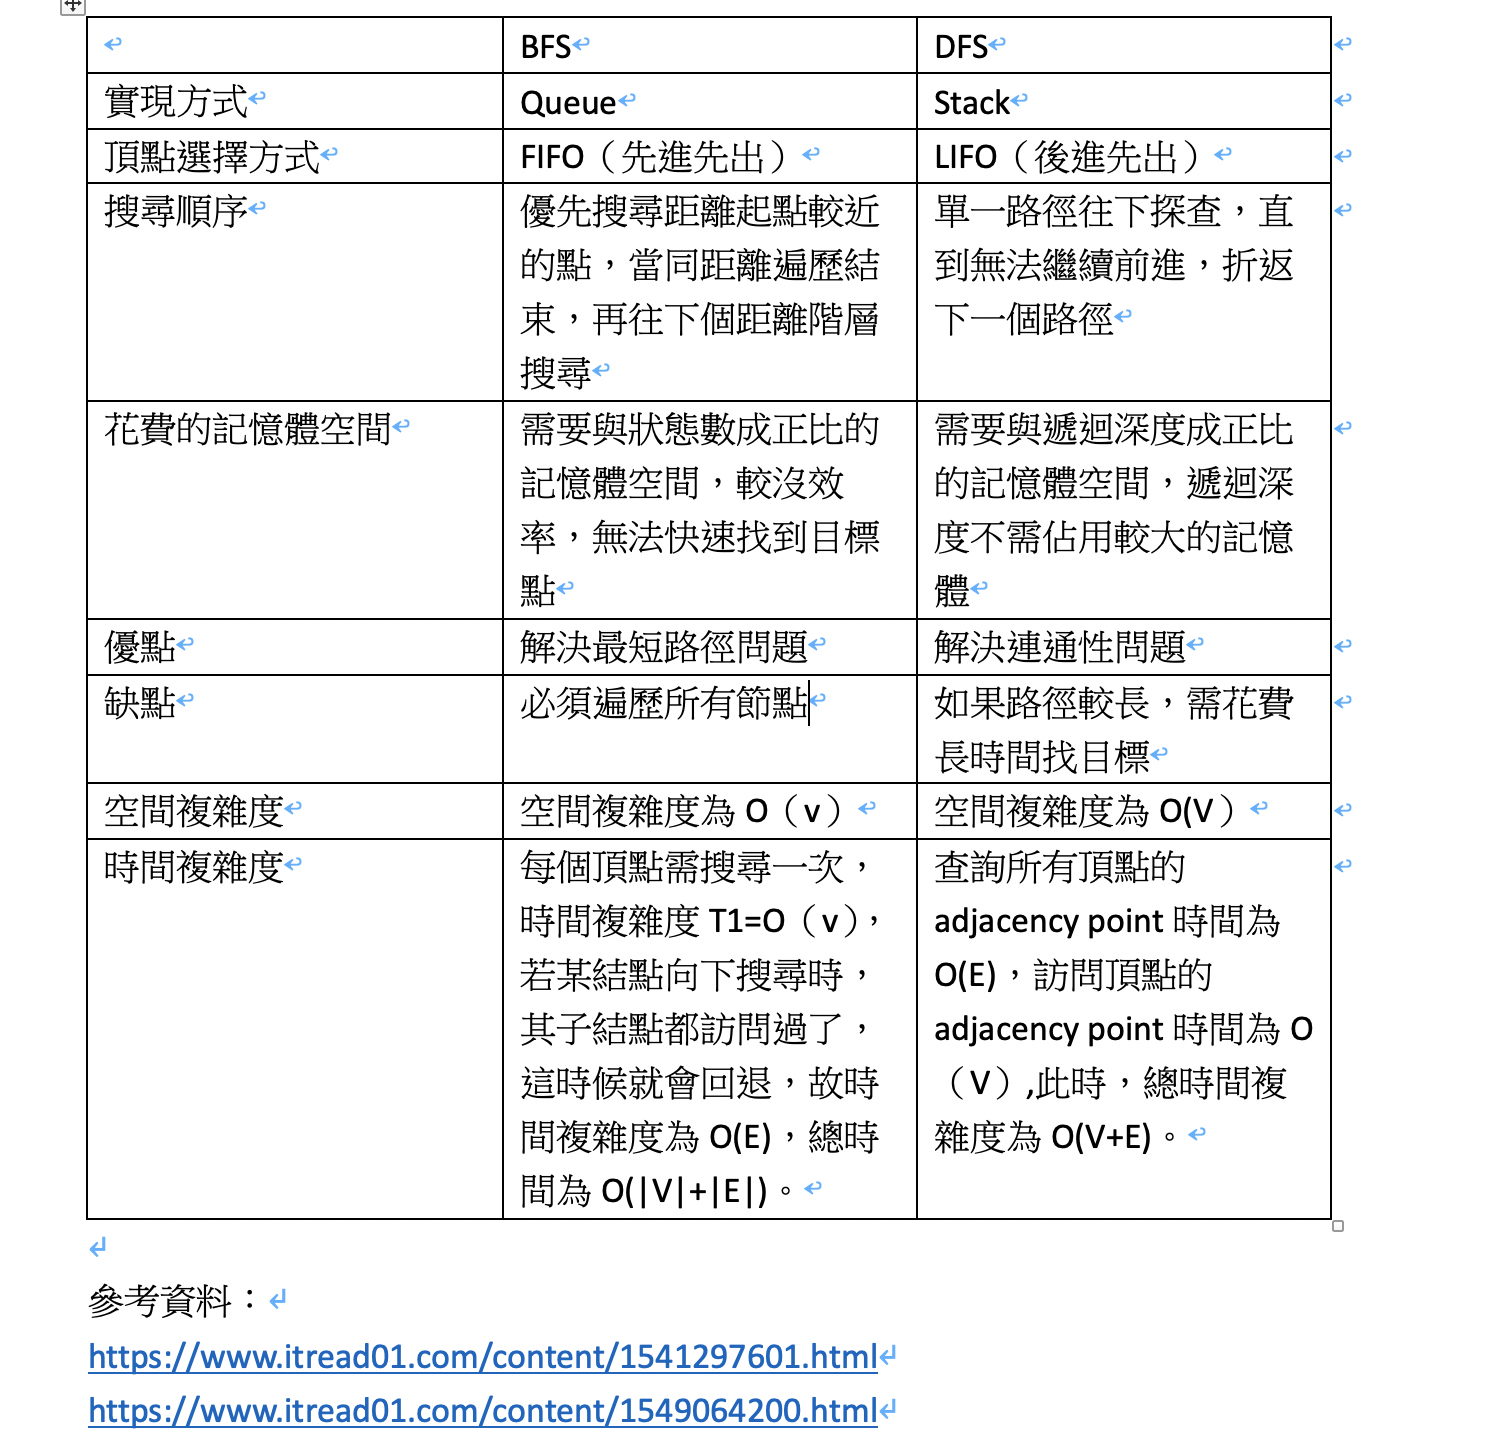

In [4]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/12:20H.W/比較.png")

#BFS流程圖

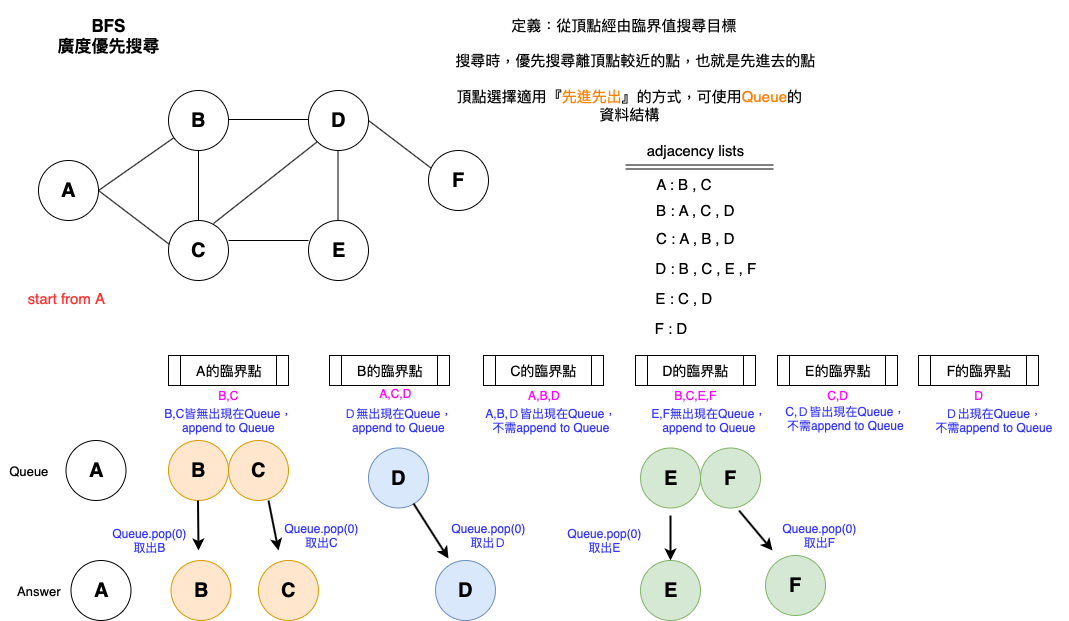

In [5]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/12:20H.W/BFS.png")

#DFS流程圖

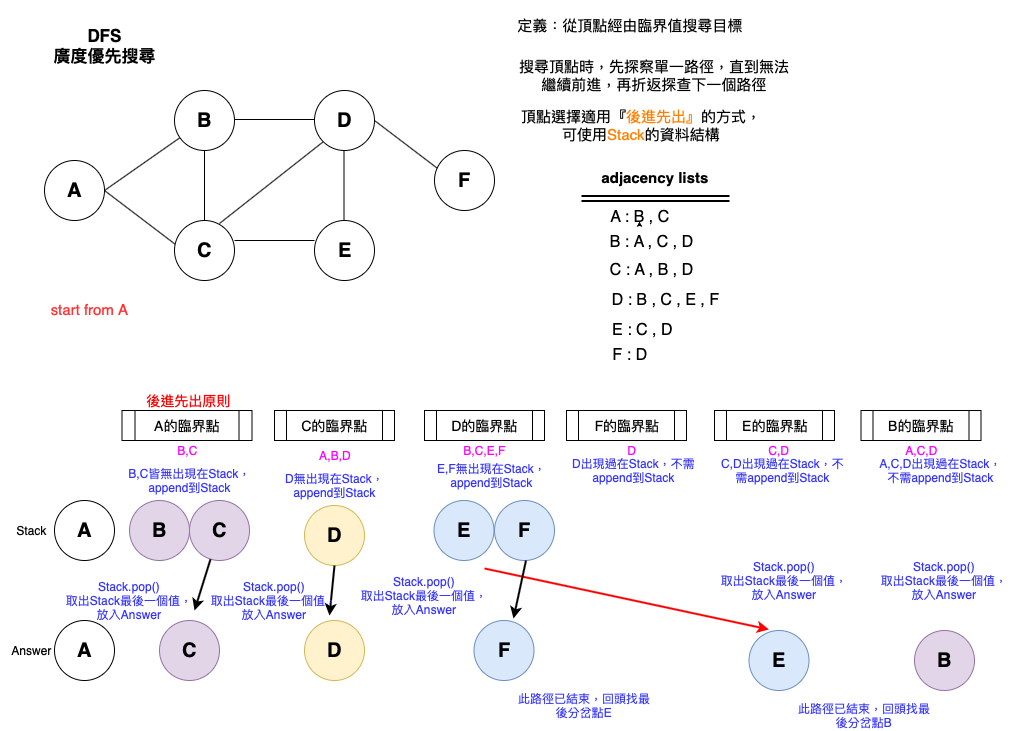

In [6]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/12:20H.W/DFS.png")